In [1]:
!pip install foscat

  Using cached foscat-3.0.29-py3-none-any.whl.metadata (1.0 kB)
  Using cached tensorflow-2.16.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.3 kB)
  Using cached healpy-1.17.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.16.2-py3-none-any.w

In [1]:
import xarray as xr
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import foscat.Synthesis as synthe


# Get data from copernicus marine services, and extract what we need in ds

In [2]:
L4=xr.open_zarr(
 "https://s3.waw3-1.cloudferro.com/mdl-arco-geo-045/arco/SST_GLO_PHY_L4_NRT_010_043/cmems_obs-sst_glo_phy_nrt_l4_P1D-m_202303/geoChunked.zarr"
 )
L4

<xarray.Dataset> Size: 181GB
Dimensions:           (time: 1258, latitude: 1600, longitude: 3600)
Coordinates:
  * latitude          (latitude) float32 6kB -79.95 -79.85 ... 79.85 79.95
  * longitude         (longitude) float32 14kB -179.9 -179.9 ... 179.9 179.9
  * time              (time) datetime64[ns] 10kB 2021-01-01 ... 2024-06-11
Data variables:
    analysed_sst      (time, latitude, longitude) float64 58GB dask.array<chunksize=(226, 32, 64), meta=np.ndarray>
    analysis_error    (time, latitude, longitude) float64 58GB dask.array<chunksize=(226, 32, 64), meta=np.ndarray>
    mask              (time, latitude, longitude) int8 7GB dask.array<chunksize=(226, 32, 64), meta=np.ndarray>
    sea_ice_fraction  (time, latitude, longitude) float64 58GB dask.array<chunksize=(226, 32, 64), meta=np.ndarray>
Attributes: (12/71)
    Conventions:                     CF-1.7, ACDD-1.3, ISO 8601
    acknowledgment:                  This dataset is funded by Copernicus Mar...
    cdm_data_type:                   grid
    citation:                        Ifremer / CERSAT. 2022. ODYSSEA Global H...
    cmems_product_id:                SST_GLO_PHY_L4_NRT_010_043
    contact:                         emmanuelle.autret@ifremer.fr;jfpiolle@if...
    ...                              ...
    temporal_resolution:             daily
    time_coverage_end:               2024-02-06T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2024-02-05T12:00:00Z
    title:                           ODYSSEA Global Sea Surface Temperature G...
    uuid:                            1d893532-b9bb-4bc7-88e0-bb3bf619b72b

In [3]:
L3S=xr.open_zarr("https://s3.waw3-1.cloudferro.com/mdl-arco-time-045/arco/SST_GLO_SST_L3S_NRT_OBSERVATIONS_010_010/IFREMER-GLOB-SST-L3-NRT-OBS_FULL_TIME_SERIE_202211/timeChunked.zarr"
)
L3S

<xarray.Dataset> Size: 696GB
Dimensions:                           (time: 1258, latitude: 1600,
                                       longitude: 3600)
Coordinates:
  * latitude                          (latitude) float32 6kB -79.95 ... 79.95
  * longitude                         (longitude) float32 14kB -179.9 ... 179.9
  * time                              (time) datetime64[ns] 10kB 2021-01-01 ....
Data variables: (12/14)
    adjusted_sea_surface_temperature  (time, latitude, longitude) float64 58GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    bias_to_reference_sst             (time, latitude, longitude) float64 58GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    or_latitude                       (time, latitude, longitude) float64 58GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    or_longitude                      (time, latitude, longitude) float64 58GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    or_number_of_pixels               (time, latitude, longitude) float32 29GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    quality_level                     (time, latitude, longitude) float32 29GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    ...                                ...
    sea_surface_temperature_stddev    (time, latitude, longitude) float32 29GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    solar_zenith_angle                (time, latitude, longitude) float64 58GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    sources_of_sst                    (time, latitude, longitude) float32 29GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    sses_bias                         (time, latitude, longitude) float64 58GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    sses_standard_deviation           (time, latitude, longitude) float64 58GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
    sst_dtime                         (time, latitude, longitude) float64 58GB dask.array<chunksize=(1, 512, 1024), meta=np.ndarray>
Attributes: (12/77)
    Conventions:                     CF-1.7, ACDD-1.3, ISO 8601
    Metadata_Conventions:            Climate and Forecast (CF) 1.7, Attribute...
    acknowledgement:                 Please acknowledge the use of these data...
    acknowledgment:                  This dataset is funded by Copernicus Mar...
    band:                            ['infrared', 'infrared', 'infrared', 'in...
    cdm_data_type:                   grid
    ...                              ...
    temporal_resolution:             daily
    time_coverage_end:               2023-12-10T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2023-12-09T12:00:00Z
    title:                           ODYSSEA Global Sea Surface Temperature G...
    uuid:                            96ef4d48-9801-11ee-a240-0cc47a3f7883

In [4]:
ds=L4[['mask','sea_ice_fraction']]
ds['SST']=L3S['sea_surface_temperature'] - 273.0
ds['quality_level']=L3S['quality_level']
ds=ds.sel(time=slice('2024-06-02', '2024-06-07')).isel(time=0)
ds['SST']=ds['SST'].where ((ds.quality_level ==5 ))#, hp.UNSEEN)
ds['new_mask']=ds.mask.where(ds.mask==1,np.nan)
ds['SST']=ds['SST'].where((ds.mask ==1 ),0.0)

#for k in range(6):
#    file_path = '2024-06-%02d'%(k+1)
#    print(file_path)
ds

<xarray.Dataset> Size: 167MB
Dimensions:           (latitude: 1600, longitude: 3600)
Coordinates:
  * latitude          (latitude) float32 6kB -79.95 -79.85 ... 79.85 79.95
  * longitude         (longitude) float32 14kB -179.9 -179.9 ... 179.9 179.9
    time              datetime64[ns] 8B 2024-06-02
Data variables:
    mask              (latitude, longitude) int8 6MB dask.array<chunksize=(32, 64), meta=np.ndarray>
    sea_ice_fraction  (latitude, longitude) float64 46MB dask.array<chunksize=(32, 64), meta=np.ndarray>
    SST               (latitude, longitude) float64 46MB dask.array<chunksize=(32, 64), meta=np.ndarray>
    quality_level     (latitude, longitude) float32 23MB dask.array<chunksize=(512, 1024), meta=np.ndarray>
    new_mask          (latitude, longitude) float64 46MB dask.array<chunksize=(32, 64), meta=np.ndarray>
Attributes: (12/71)
    Conventions:                     CF-1.7, ACDD-1.3, ISO 8601
    acknowledgment:                  This dataset is funded by Copernicus Mar...
    cdm_data_type:                   grid
    citation:                        Ifremer / CERSAT. 2022. ODYSSEA Global H...
    cmems_product_id:                SST_GLO_PHY_L4_NRT_010_043
    contact:                         emmanuelle.autret@ifremer.fr;jfpiolle@if...
    ...                              ...
    temporal_resolution:             daily
    time_coverage_end:               2024-02-06T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2024-02-05T12:00:00Z
    title:                           ODYSSEA Global Sea Surface Temperature G...
    uuid:                            1d893532-b9bb-4bc7-88e0-bb3bf619b72b

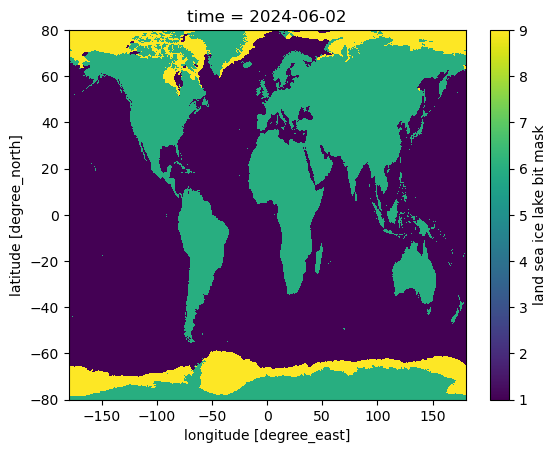

In [73]:
ds['mask'].plot()

# Get the SST DATA and convertit in HEALPix

In [5]:
# define the healpix resolution
nside = 128
nest = True
full_cell_ids = range(0, 12*nside**2)


In [6]:
ds_healpix=(ds
    .stack(id=('latitude', 'longitude'))
    .chunk('auto')
#    .reset_index('latitude', 'longitude',drop=False)
#    .reset_coords('latitude', 'longitude')
   )
ds_healpix['latitude_cp']=ds_healpix['latitude']
ds_healpix['longitude_cp']=ds_healpix['longitude']
th=(90.0-ds_healpix['latitude'])/180.0*np.pi
ph=2*np.pi-(ds_healpix['longitude'])/180.0*np.pi
cell_ids=hp.ang2pix(nside,th.data,ph.data,nest=nest)

ds_mask=ds_healpix[["new_mask"]].assign_coords({
        'cell_ids':(["id"],cell_ids)}).sortby('cell_ids'
                                  ).groupby('cell_ids'
                                           ).mean(skipna=False,keep_attrs=True)

ds_healpix=ds_healpix[["SST",'latitude_cp',"longitude_cp","new_mask","mask","quality_level"]].assign_coords({
#ds_healpix=ds_healpix[["SST",'latitude_cp',"longitude_cp",]].assign_coords({
        'cell_ids':(["id"],cell_ids)}).sortby('cell_ids'
                                  ).groupby('cell_ids'
                                           ).mean(skipna=True,keep_attrs=True)
ds_healpix["new_mask"]=ds_mask["new_mask"]
ds_healpix

<xarray.Dataset> Size: 9MB
Dimensions:        (cell_ids: 193800)
Coordinates:
    time           datetime64[ns] 8B 2024-06-02
  * cell_ids       (cell_ids) int64 2MB 0 1 2 3 ... 196604 196605 196606 196607
Data variables:
    SST            (cell_ids) float64 2MB dask.array<chunksize=(193800,), meta=np.ndarray>
    latitude_cp    (cell_ids) float32 775kB 0.3 0.6 0.6 0.9 ... -0.6 -0.6 -0.3
    longitude_cp   (cell_ids) float32 775kB -45.0 -45.35 -44.65 ... 45.35 45.0
    new_mask       (cell_ids) float64 2MB dask.array<chunksize=(193800,), meta=np.ndarray>
    mask           (cell_ids) float64 2MB dask.array<chunksize=(193800,), meta=np.ndarray>
    quality_level  (cell_ids) float32 775kB dask.array<chunksize=(193800,), meta=np.ndarray>
Attributes: (12/71)
    Conventions:                     CF-1.7, ACDD-1.3, ISO 8601
    acknowledgment:                  This dataset is funded by Copernicus Mar...
    cdm_data_type:                   grid
    citation:                        Ifremer / CERSAT. 2022. ODYSSEA Global H...
    cmems_product_id:                SST_GLO_PHY_L4_NRT_010_043
    contact:                         emmanuelle.autret@ifremer.fr;jfpiolle@if...
    ...                              ...
    temporal_resolution:             daily
    time_coverage_end:               2024-02-06T12:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2024-02-05T12:00:00Z
    title:                           ODYSSEA Global Sea Surface Temperature G...
    uuid:                            1d893532-b9bb-4bc7-88e0-bb3bf619b72b

In [7]:
                                                 
ds_healpix=ds_healpix.assign_coords({
        'latitude':(["cell_ids"],ds_healpix.latitude_cp.data),
        'longitude':(["cell_ids"],ds_healpix.longitude_cp.data),}
    )
# Reindex the dataset with the new coordinate values, filling missing values with np.nan
ds_healpix=ds_healpix.drop_vars(["latitude_cp","longitude_cp"])

ds_healpix=ds_healpix.reindex(cell_ids=full_cell_ids, fill_value=np.nan)
ds_healpix.cell_ids.attrs = {
    "grid_name": "healpix",
    "nside": nside,
    "nest": nest,
}
ds_healpix=ds_healpix.persist()

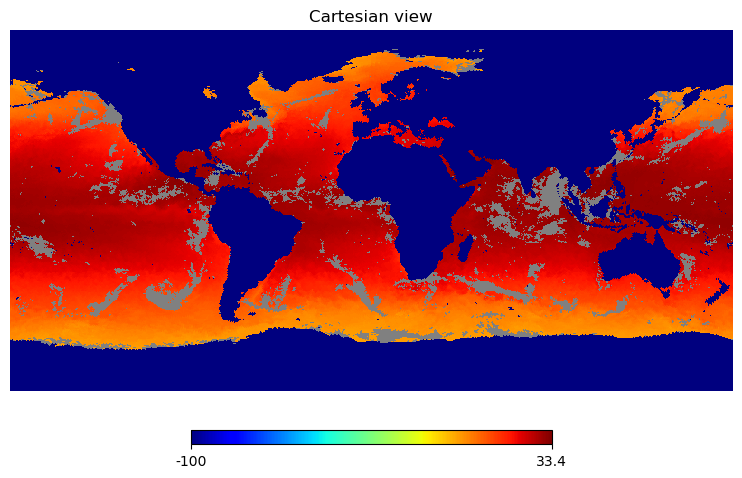

In [8]:
hp.cartview(ds_healpix.SST.where(ds_healpix.new_mask==1,-100).compute().data,cmap='jet',nest=True)

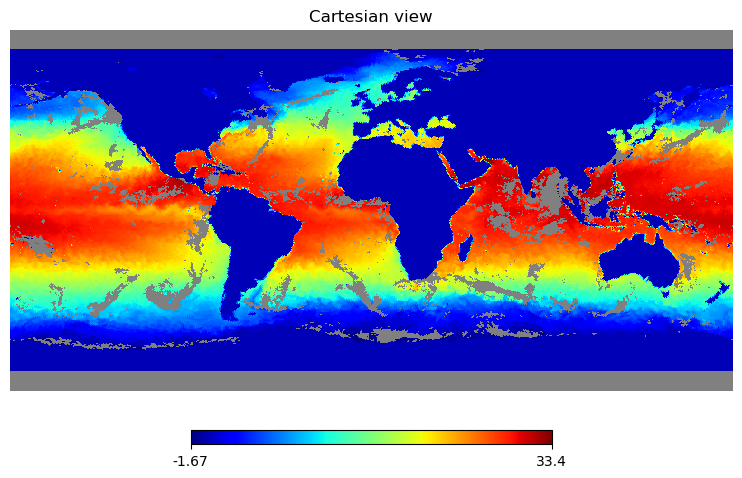

In [9]:
hp.cartview(ds_healpix.SST.compute().data,cmap='jet',nest=True)

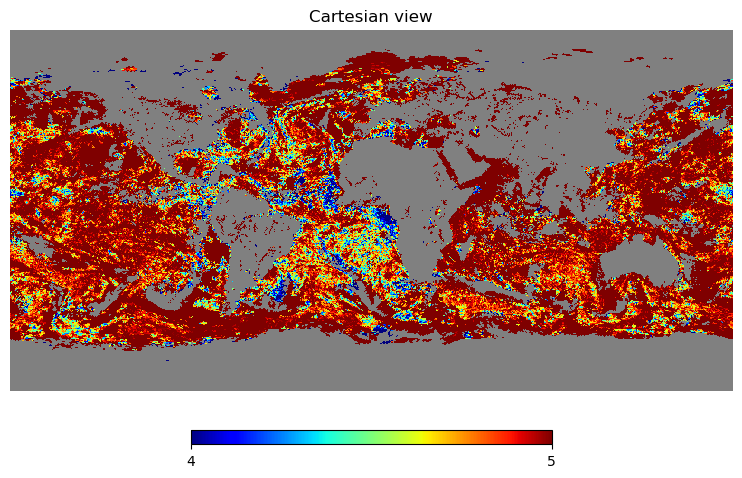

In [10]:
hp.cartview(ds_healpix.quality_level.compute().data,cmap='jet',nest=True)

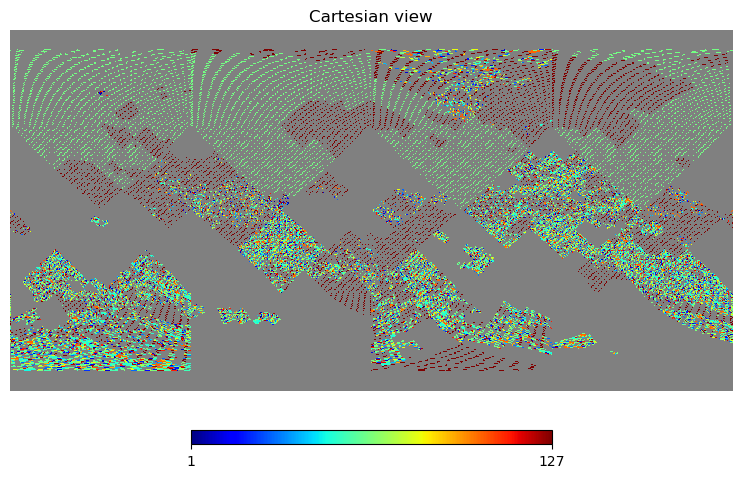

In [11]:
hp.cartview(ds_healpix.mask.compute().data,cmap='jet',nest=True)

<Figure size 640x480 with 0 Axes>

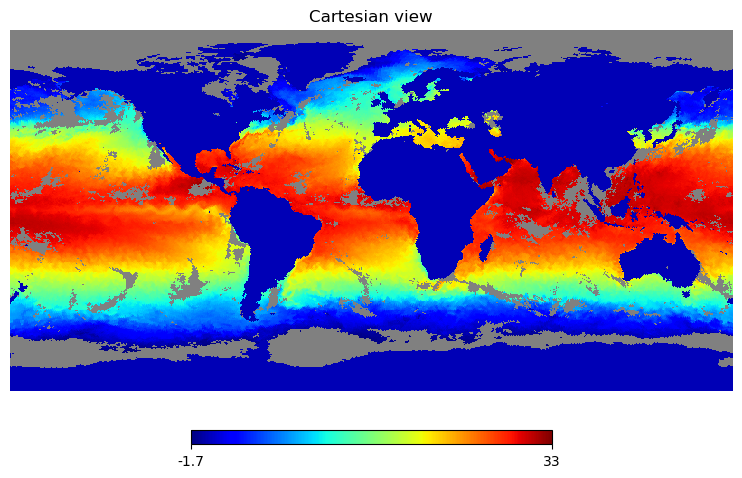

In [5]:
for i in range(1):
    plt.figure()
    hp.cartview(data[i],cmap='jet',nest=True)

In [60]:
data=ds_healpix.SST.where(ds_healpix.new_mask==1,0).compute().data
#data=ds_healpix.SST.compute().data
im=data[0].copy()
mask=np.expand_dims((data[0]!=hp.UNSEEN)*(bathy<0),0)
# JM, here mask is cloud mask? or land mask?



NameError: name 'bathy' is not defined

2024-06-09 22:14:19.370640: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


1 Physical GPUs, 1 Logical GPUs


2024-06-09 22:14:23.524701: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20972 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:61:00.0, compute capability: 8.9


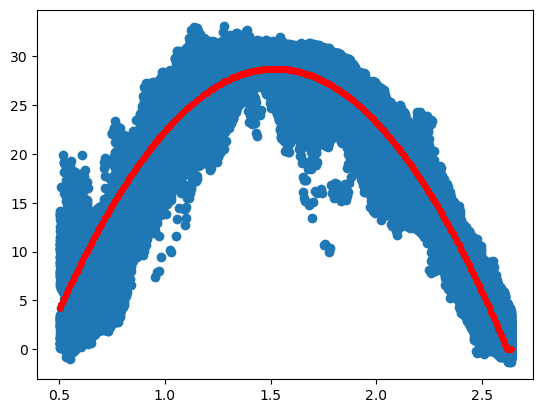

In [6]:
import foscat.scat_cov as sc

scat=sc.funct(silent=True, 
              JmaxDelta=4,        # The used Jmax is Jmax-JmaxDelta
              mask_norm=True,          # normalize mask
              mask_thres=0.7)


im=data[0].copy()

mask=np.expand_dims((data[0]!=hp.UNSEEN)*(bathy<0),0)

t,p=hp.pix2ang(nside,np.arange(12*nside**2),nest=True)
a=np.polyfit(t[mask[0]],im[mask[0]],2)

tmp=a[0]*t**2+a[1]*t+a[2]
tmp[tmp<0]=0.0
im[im==hp.UNSEEN]=tmp[im==hp.UNSEEN]
mask=np.expand_dims((data[0]!=hp.UNSEEN)*(bathy<0)*(t>0.5)*(t<np.pi-0.5),0)

plt.scatter(t[mask[0]],im[mask[0]])
plt.plot(t[mask[0]],tmp[mask[0]],'.',color='r')

ref=scat.eval(im,mask=mask)

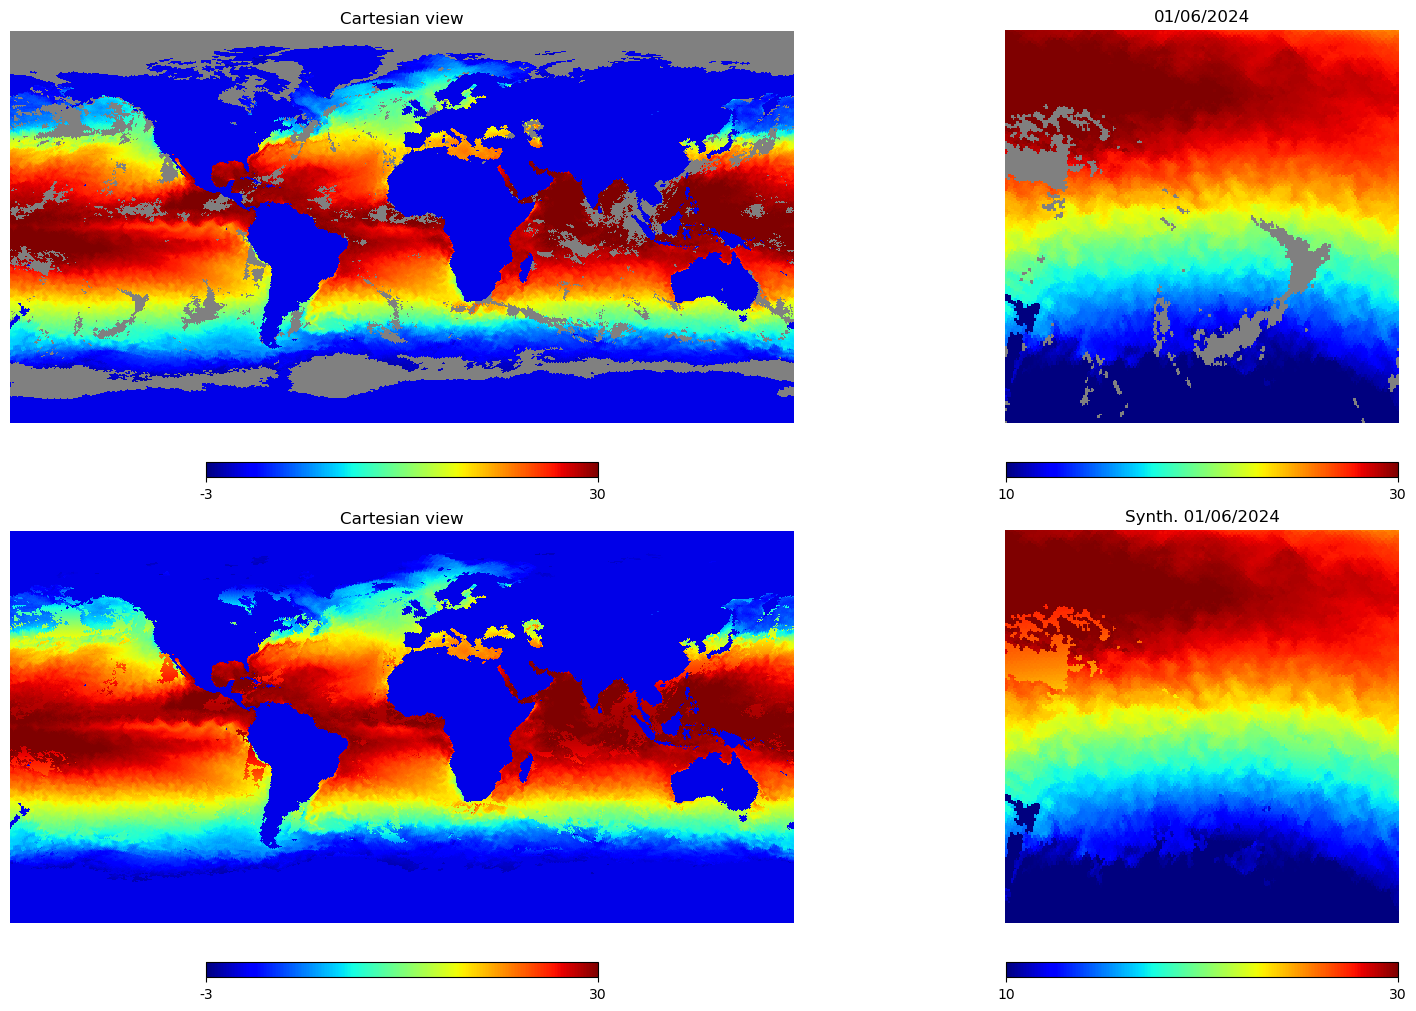

In [7]:
plt.figure(figsize=(16,10))
hp.cartview(data[0],nest=True,min=-3,max=30,cmap='jet',hold=False,sub=(2,2,1))
hp.cartview(im,nest=True,min=-3,max=30,cmap='jet',hold=False,sub=(2,2,3))
hp.gnomview(data[0],nest=True,min=10,max=30,cmap='jet',rot=[140,-30],reso=15,notext=True,
            title='01/06/2024',hold=False,sub=(2,2,2),xsize=256)
hp.gnomview(im,nest=True,min=10,max=30,cmap='jet',rot=[140,-30],reso=15,notext=True,
            title='Synth. 01/06/2024',hold=False,sub=(2,2,4),xsize=256)

In [8]:
def The_loss_function(x,scat_operator,args,return_all=False):

    ref = args[0]
    mask = args[1]

    learn=scat_operator.eval(x,mask=mask)

    loss=scat_operator.reduce_mean(scat_operator.square((ref-learn)/ref))

    return(loss)

In [9]:
#Start image is the input data
imap=im.copy()
imap

mask=np.expand_dims((bathy<0)*(t>0.5)*(t<np.pi-0.5),0)

loss=synthe.Loss(The_loss_function,scat,ref,
                 scat.backend.constant(scat.backend.bk_cast(mask)))

sy = synthe.Synthesis([loss])

#=================================================================================
# RUN ON SYNTHESIS
#=================================================================================

omap=sy.run(scat.backend.bk_cast(imap),
            EVAL_FREQUENCY=100,
            grd_mask=data[0]==hp.UNSEEN, # only the gradient of masked data is computed
            NUM_EPOCHS = 1000).numpy()

Total number of loss  1
 Run [PROC=0000] on GPU /device:GPU:0
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Itt      0 L=     0.164 (     0.164 ) 31.338s 
Itt    100 L=  0.000881 (  0.000881 ) 12.908s 
Itt    200 L=  0.000869 (  0.000869 ) 12.305s 
Itt    300 L=  0.000863 (  0.000863 ) 12.241s 
Itt    4

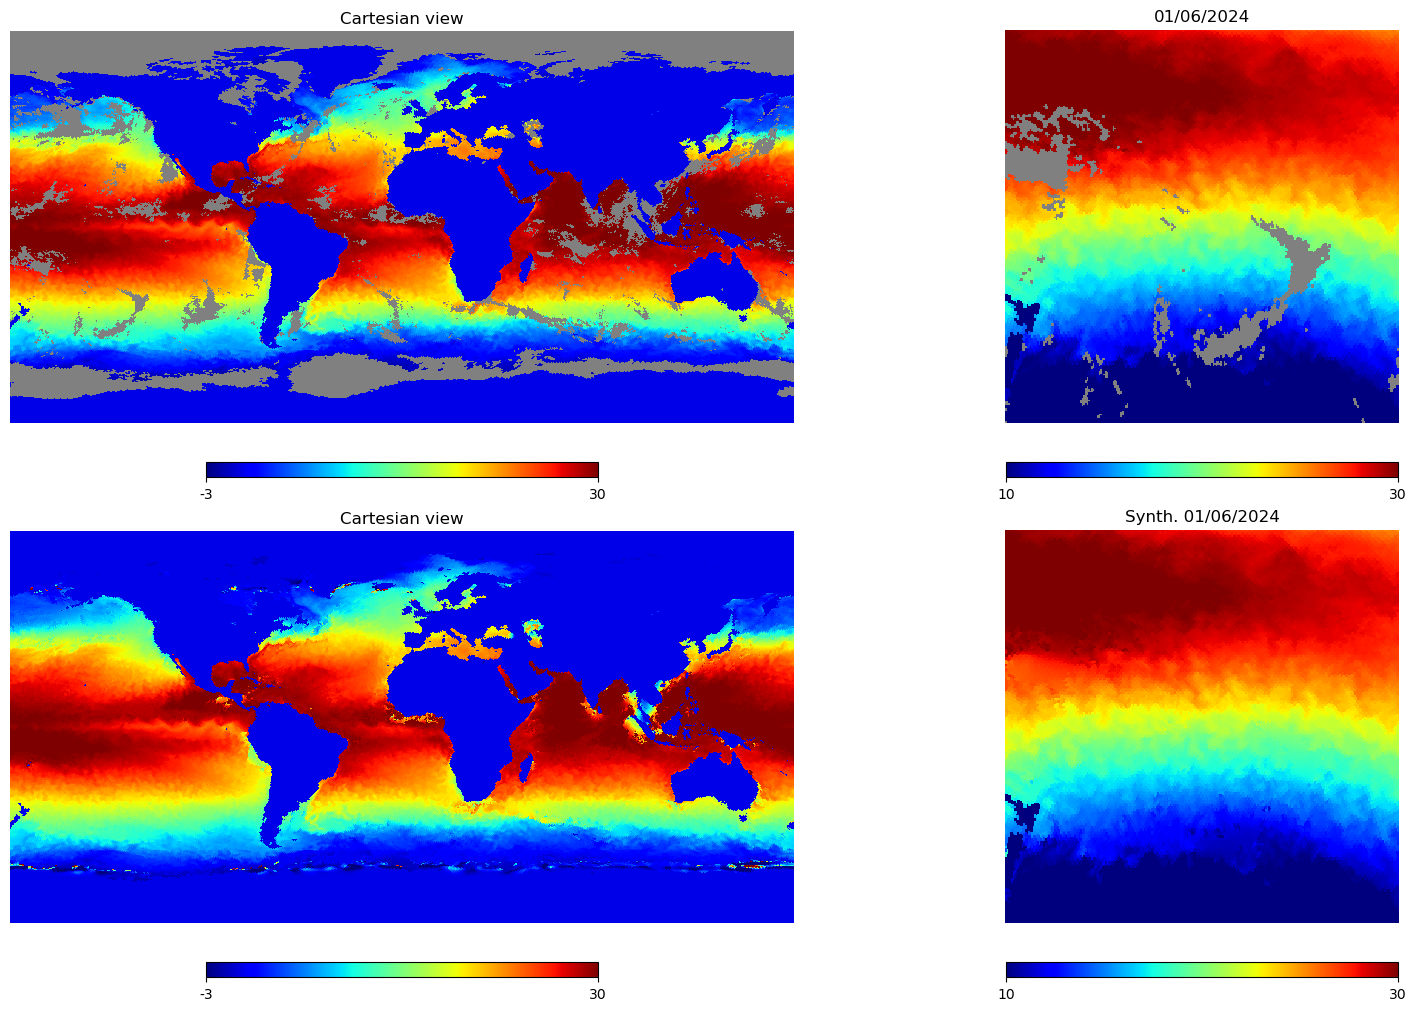

In [10]:
plt.figure(figsize=(16,10))
hp.cartview(data[0],nest=True,min=-3,max=30,cmap='jet',hold=False,sub=(2,2,1))
hp.cartview(omap,nest=True,min=-3,max=30,cmap='jet',hold=False,sub=(2,2,3))
hp.gnomview(data[0],nest=True,min=10,max=30,cmap='jet',rot=[140,-30],reso=15,notext=True,
            title='01/06/2024',hold=False,sub=(2,2,2),xsize=256)
hp.gnomview(omap,nest=True,min=10,max=30,cmap='jet',rot=[140,-30],reso=15,notext=True,
            title='Synth. 01/06/2024',hold=False,sub=(2,2,4),xsize=256)